Sistema inteligente con Red neuronal artificial MLP que clasifica si en una imagen hay un gato

https://www.tensorflow.org/tutorials/keras/classification?hl=es-419

Vinculo con github para acceso a comun




In [ ]:
! git clone https://github.com/FNLucero/CatsRecognizer

Se importan las librerias necesarias para el manejo de imágenes

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from random import randint

Carga de imágenes de Gatitos y redimención de las imágenes a 100x100

In [2]:
michis_path = "./datos/cats"
michis = []
img_size = 100
for img in os.listdir(michis_path):
  img = cv2.imread(os.path.join(michis_path, img))
  img_resize = cv2.resize(img, (img_size, img_size))
  michis.append(img_resize)

Carga de set de datos de gatos

In [3]:
michis = np.array(michis)
print(michis.shape)
#cantidad, alto, ancho y escala de colores

(35, 100, 100, 3)


(100, 100, 3)


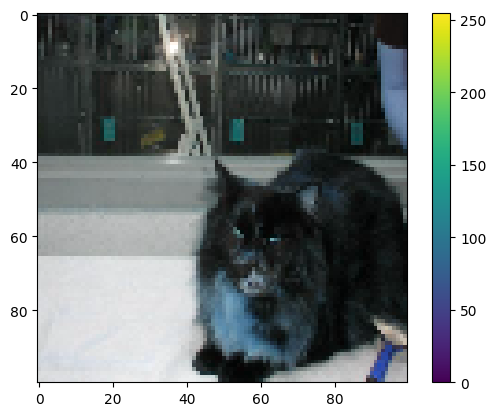

In [4]:
#Se muestra una imagen al azar para ver como se visualiza
num = randint(0,34)
print(michis[num].shape)
plt.figure()
plt.imshow(np.squeeze(michis[num]))
plt.colorbar()
plt.grid(False)
plt.show()

Carga de imagenes de NO Gatos

In [5]:
no_michis_path = "./datos/others"
no_michis = []
img_size = 100
for img in os.listdir(no_michis_path):
  img = cv2.imread(os.path.join(no_michis_path, img))
  img_resize = cv2.resize(img, (img_size, img_size))
  no_michis.append(img_resize)

In [6]:
no_michis = np.array(no_michis)
print(no_michis.shape)
#cantidad, alto, ancho y escala de colores

(35, 100, 100, 3)


(100, 100, 3)


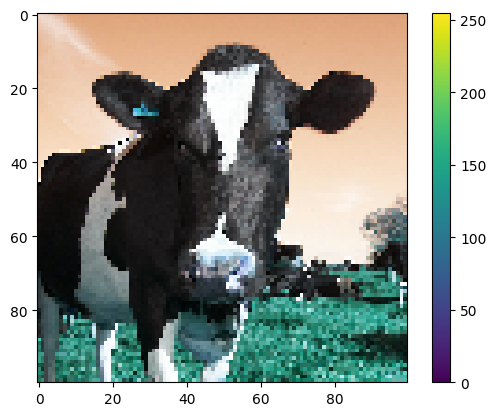

In [7]:
#Se muestra una imagen al azar para ver como se visualiza
num = randint(0,34)
print(no_michis[num].shape)
plt.figure()
plt.imshow(np.squeeze(no_michis[num]))
plt.colorbar()
plt.grid(False)
plt.show()

Unificación de listas

In [8]:
#Unificamos listas para generar las etiquetas clasificando los gatos de lo que no es
imagines = np.concatenate([michis, no_michis])
print(len(imagines))
imagines = np.array(imagines)

#cantidad total de imagenes, alto, ancho, canales de color(RGB))
print(imagines.shape)

70
(70, 100, 100, 3)


In [9]:
#Generamos los tensores para cada etiqueta
label_michis = np.repeat(0, 35)
label_no_michis = np.repeat(1, 35)

In [10]:
#Generamos una clase para asociar los tensores a las etiquetas
class_names_michis = ['Michis', 'No_Michis']
label_all = np.concatenate([label_michis, label_no_michis])
label_all = np.array(label_all)

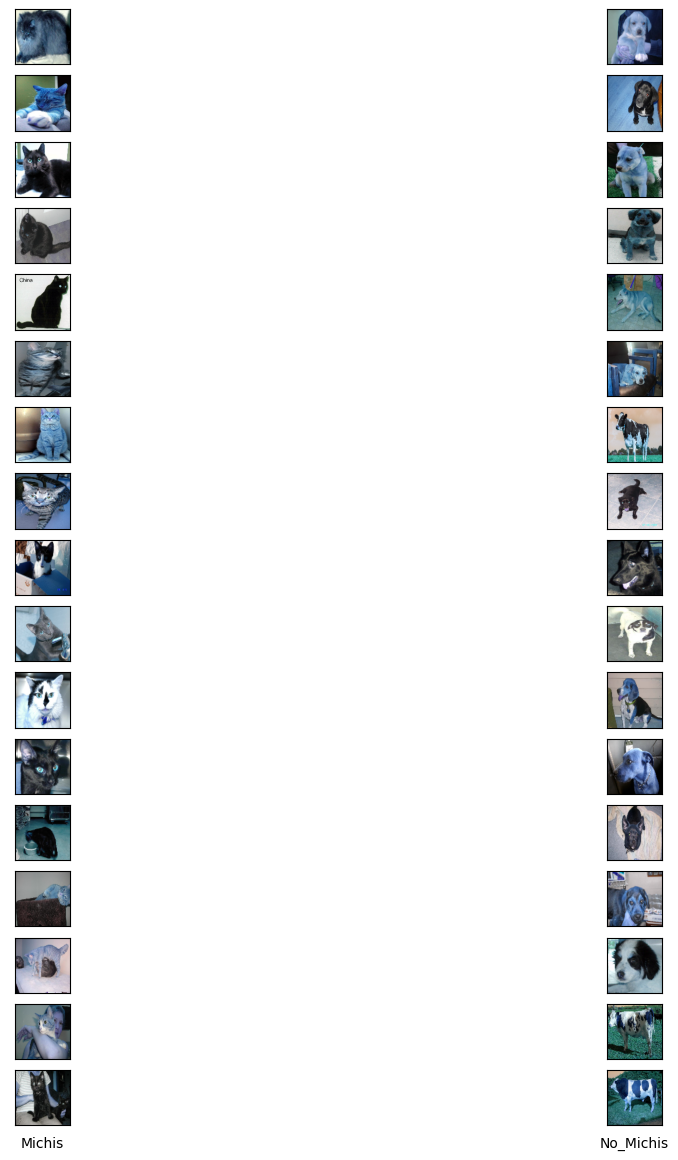

In [11]:
#Se procede a plotear las imagenes
plt.figure(figsize=(14,30))

for i in range(34):
    plt.subplot(35,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i % 2) == 0:
        plt.imshow(imagines[i], cmap=plt.cm.binary)
    else:
        plt.imshow(imagines[i+35], cmap=plt.cm.binary)
    if i == 32:
        plt.xlabel(class_names_michis[0])
plt.xlabel(class_names_michis[1])

plt.show()

In [12]:
#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer
import numpy as np
import matplotlib.pyplot as plt

# Construccion del modelo para la clasificacion 

In [13]:
#configuracion de capas de red neuronal artificial
model = keras.Sequential([                   
    keras.layers.Flatten(input_shape=(100, 100, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

# Compilacion del modelo

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del Modelo

In [15]:
trained = model.fit(imagines, label_all, epochs=35)

Epoch 1/35
3/3 [==============================] - 1s 59ms/step - loss: 1441.7554 - accuracy: 0.4286
Epoch 2/35
3/3 [==============================] - 0s 49ms/step - loss: 3325.1536 - accuracy: 0.5286
Epoch 3/35
3/3 [==============================] - 0s 48ms/step - loss: 5676.4517 - accuracy: 0.5000
Epoch 4/35
3/3 [==============================] - 0s 37ms/step - loss: 3697.9148 - accuracy: 0.5000
Epoch 5/35
3/3 [==============================] - 0s 48ms/step - loss: 3428.8904 - accuracy: 0.5000
Epoch 6/35
3/3 [==============================] - 0s 48ms/step - loss: 2335.8035 - accuracy: 0.5286
Epoch 7/35
3/3 [==============================] - 0s 41ms/step - loss: 602.8248 - accuracy: 0.7429
Epoch 8/35
3/3 [==============================] - 0s 42ms/step - loss: 2390.6047 - accuracy: 0.5857
Epoch 9/35
3/3 [==============================] - 0s 40ms/step - loss: 637.7948 - accuracy: 0.7286
Epoch 10/35
3/3 [==============================] - 0s 41ms/step - loss: 1339.2545 - accuracy: 0.6143
E

Se grafica el error general en el tiempo (por cada epoch)

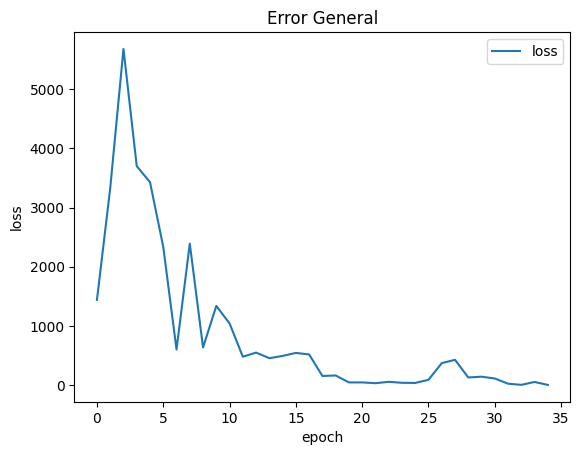

In [20]:
plt.plot(trained.history['loss'])
#plt.plot(trained.history['accuracy'])
plt.title('Error General')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
data = np.array(imagines, dtype="float") / 255.0
(trainX, testX, trainY, testY) = train_test_split(data, label_all, test_size=0.25)

1/1 [==============================] - 0s 36ms/step


C:\Users\HD279CW\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
C:\Users\HD279CW\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


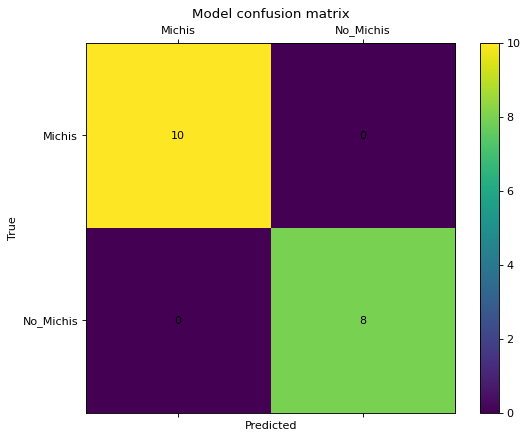

Accuracy : 100.00%


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = np.argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + class_names_michis)
ax.set_yticklabels([''] + class_names_michis)

for i in range(2):
    for j in range(2):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

## Evaluacion del rendimiento del modelo

In [16]:
test_loss, test_acc = model.evaluate(imagines,  label_all, verbose=2)
print('\nTest accuracy:', test_acc)

3/3 - 0s - loss: 11.9329 - accuracy: 0.9571 - 215ms/epoch - 72ms/step

Test accuracy: 0.9571428298950195


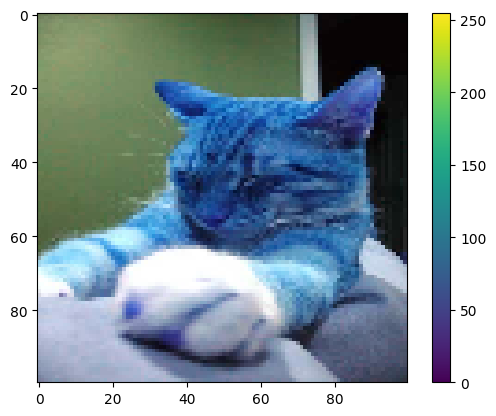

In [17]:
#Luego del entrenamiento del modelo, probamos una imagen de las que se cargaron para probar individualmente
num = randint(0,70)
prueba_michi = imagines[num]
prueba_michi = np.expand_dims(prueba_michi, 0)
plt.figure()
plt.imshow(imagines[num])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
#se verifica la relacion tensor y class de una de las imagenes cargadas y ya entrenadas
predictions_single = model.predict(prueba_michi)

print("> Nro de Etiqueta o tensor: ", np.argmax(predictions_single))
print("> Etiqueta: ", class_names_michis[np.argmax(predictions_single)])

1/1 [==============================] - 0s 100ms/step
> Nro de Etiqueta o tensor:  0
> Etiqueta:  Michis


# Prediccion

Se procede a probar algunas imágenes que no formen parte del set de datos para corroborar el funcionamiento de la Red neuronal artificial

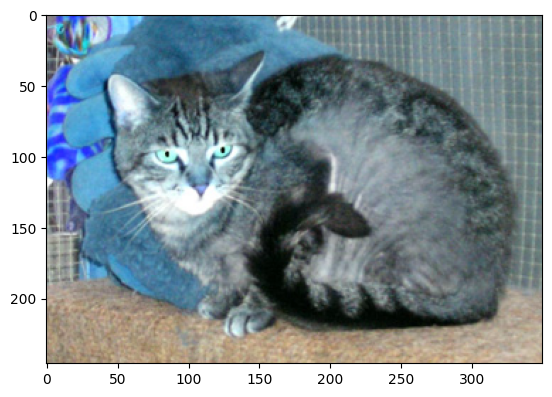

(1, 100, 100, 3)
1/1 [==============================] - 0s 27ms/step
> Nro de Etiqueta o tensor:  0
> Etiqueta:  Michis


In [26]:
#Ejemplo 1
img_a_predecir = cv2.imread('./datos/pruebas/michi4.jpg')

plt.imshow(img_a_predecir)
plt.show()

#Se ajustan las dimensiones para que sea como las imágenes aprendidas
img_a_predecir = cv2.resize(img_a_predecir, (img_size, img_size))
img_a_predecir = np.expand_dims(img_a_predecir, 0)
#etiqueta, alto, ancho y canales de color (RGB)
print(img_a_predecir.shape)

predictions_single = model.predict(img_a_predecir)

print("> Nro de Etiqueta o tensor: ", np.argmax(predictions_single))
print("> Etiqueta: ", class_names_michis[np.argmax(predictions_single)])

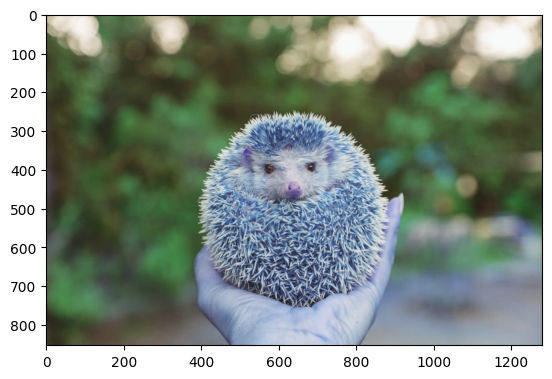

(1, 100, 100, 3)
1/1 [==============================] - 0s 49ms/step
> Nro de Etiqueta o tensor:  0
> Etiqueta:  Michis


In [68]:
#Ejemplo 2
img_a_predecir = cv2.imread('./datos/pruebas/erizo.jpg')

plt.imshow(img_a_predecir)
plt.show()

#Se ajustan las dimensiones para que sea como las imágenes aprendidas
img_a_predecir = cv2.resize(img_a_predecir, (img_size, img_size))
img_a_predecir = np.expand_dims(img_a_predecir, 0)
#etiqueta, alto, ancho y canales de color (RGB)
print(img_a_predecir.shape)

predictions_single = model.predict(img_a_predecir)

print("> Nro de Etiqueta o tensor: ", np.argmax(predictions_single))
print("> Etiqueta: ", class_names_michis[np.argmax(predictions_single)])